In [1]:
!pip install -q -U transformers==4.37.2
!pip install -q -U accelerate==0.25.0 bitsandbytes=0.41.3
!pip install -q git+https://github.com/openai/whisper.git
!pip install -q gradio
!pip install -q gTTS

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 41.5 MB/s eta 0:00:00
ERROR: Invalid requirement: 'bitsandbytes=0.41.3': Expected end or semicolon (after name and no valid version specifier)
    bitsandbytes=0.41.3
                ^
Hint: = is not a valid operator. Did you mean == ?
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

In [2]:
!pip install -q git+https://github.com/openai/whisper.git
!pip install -q gradio

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
pip install bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 MB 6.4 MB/s eta 0:00:00


In [15]:
import locale
print(locale.getpreferredencoding())

ANSI_X3.4-1968


In [16]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [17]:
pip install diffusers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 41.3 MB/s eta 0:00:00


In [4]:
import torch
from transformers import BitsAndBytesConfig,pipeline
quant_config=BitsAndBytesConfig(
    load_in_4bit=True,

    bnb_4bit_compute_dtype=torch.float16
)

In [5]:
model_id="llava-hf/llava-1.5-7b-hf"
pipe =pipeline("image-to-text",model=model_id,model_kwargs={"quantization_config":quant_config})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

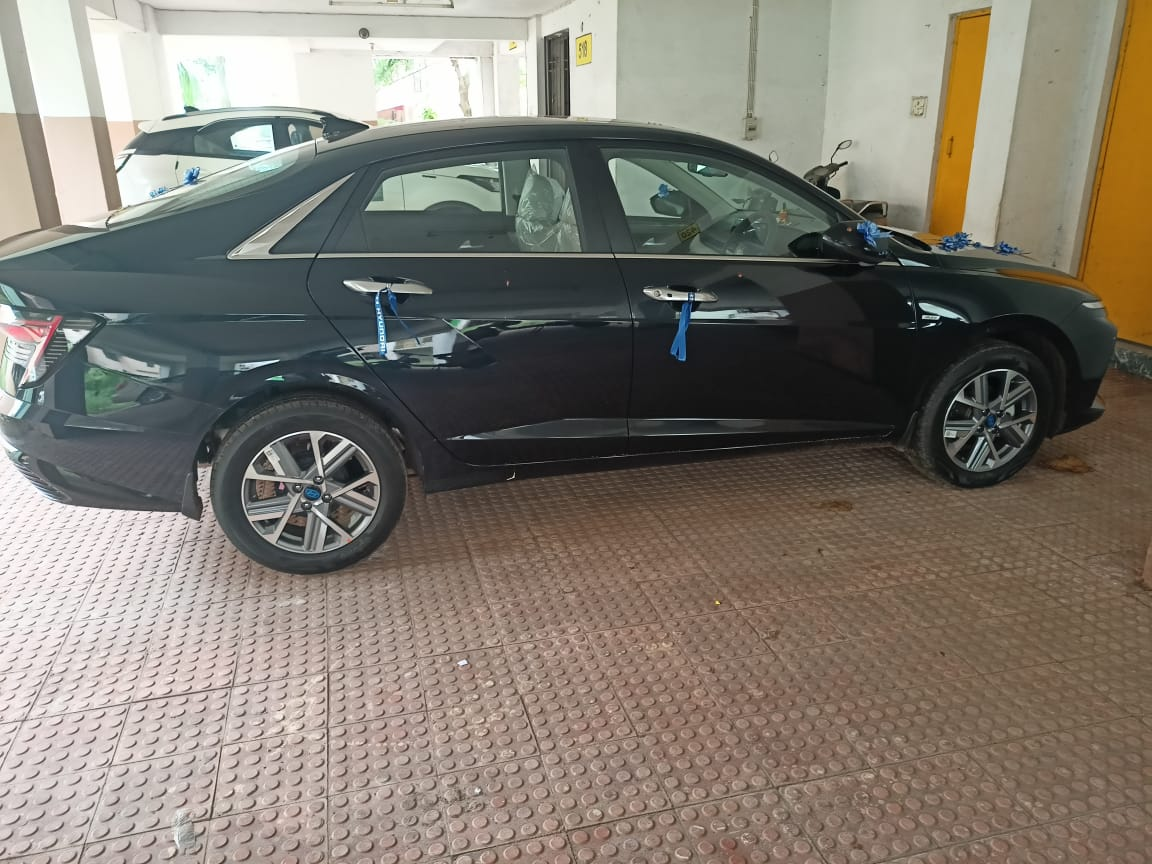

In [7]:
import whisper
import gradio as grd
import time
import os
from gtts import gTTS
from PIL import Image
image_path="/content/verna.jpg"
image=Image.open(image_path)
image


In [8]:
import locale
max_new_tokens=200
prompt_instructions="Describe the image and what is present in it"
prompt ="User: <image>\n"+prompt_instructions+"\nAssistant:"
#outputs instructions
output=pipe(image,prompt=prompt,max_new_tokens=max_new_tokens)
output


[{'generated_text': 'User:  \nDescribe the image and what is present in it\nAssistant: The image features a black car parked in a parking lot. The car is equipped with a tow hitch, and there are blue ribbons tied to the hitch. The car is positioned in the middle of the parking lot, and there are no other cars visible in the scene.'}]

In [20]:
from gtts import gTTS
import numpy as np
torch.cuda.is_available()
DEVICE="cuda" if torch.cuda.is_available() else "cpu"


In [21]:
from diffusers import StableDiffusionPipeline
sd_model_id = "CompVis/stable-diffusion-v1-4"
sd_pipe = StableDiffusionPipeline.from_pretrained(sd_model_id, torch_dtype=torch.float16).to(DEVICE)



Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [22]:
import datetime
## Logger file
tstamp = datetime.datetime.now()
tstamp = str(tstamp).replace(' ','_')
logfile = f'{tstamp}_log.txt'
def writehistory(text):
    with open(logfile, 'a', encoding='utf-8') as f:
        f.write(text)
        f.write('\n')
    f.close()

In [23]:
def transcribe(audio):
    if audio is None or audio.strip() == "":
        return "No audio provided."

    audio_data = whisper.load_audio(audio)
    audio_data = whisper.pad_or_trim(audio_data)
    mel = whisper.log_mel_spectrogram(audio_data).to(model.device)
    _, probs = model.detect_language(mel)
    options = whisper.DecodingOptions()
    result = whisper.decode(model, mel, options)
    result_text = result.text
    return result_text

In [24]:
def img2txt(input_text, input_image):
    image = Image.open(input_image)
    prompt_instructions = f"Act as an expert in imagery descriptive analysis. {input_text}"
    prompt = "USER: <image>\n" + prompt_instructions + "\nASSISTANT:"
    outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
    if outputs and len(outputs[0]["generated_text"]) > 0:
        match = re.search(r'ASSISTANT:\s*(.*)', outputs[0]["generated_text"])
        reply = match.group(1) if match else "No response found."
    else:
        reply = "No response generated."
    return reply

In [25]:
def modify_image_with_sd(input_image, prompt):
    image = Image.open(input_image)
    modified_image = sd_pipe(prompt=prompt, init_image=image, strength=0.75, guidance_scale=7.5).images[0]
    return modified_image

# Function for text-to-speech
def text_to_speech(text, filepath):
    audioobject = gTTS(text=text, lang="en", slow=False)
    audioobject.save(filepath)
    return filepath

In [26]:
def process_inputs(audio_path, image_path, sd_prompt):
    speech_to_text_output = transcribe(audio_path)
    llava_output = img2txt(speech_to_text_output, image_path) if image_path else "No image uploaded"
    processed_audio = text_to_speech(llava_output, 'output.mp3')
    modified_image = modify_image_with_sd(image_path, sd_prompt) if sd_prompt else None

    return speech_to_text_output, llava_output, processed_audio, modified_image

In [29]:
import re
inter = grd.Interface(
    fn=process_inputs,
    inputs=[
        grd.Audio(sources="microphone", type="filepath"),
        grd.Image(type="filepath"),
        grd.Textbox(label="Stable Diffusion Prompt (Optional)")
    ],
    outputs=[
        grd.Textbox(label="Speech to Text Output"),
        grd.Textbox(label="LLava Output"),
        grd.Audio(label="Processed Audio"),
        grd.Image(label="Modified Image")
    ],
    title="Learn From LLava with Stable Diffusion",
    description="Upload an image, provide a voice input, and optionally alter the image using a text prompt."
)

inter.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://49d168d98da10ead88.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://49d168d98da10ead88.gradio.live
